# NFL Data Cleaning 
### Discovery and Cleaning of Raw Dataset for Further Analysis

In [1]:
#importing dependancies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#import raw data for discovery and cleaning using pandas
df = pd.read_csv(r'raw_data\spreadspoke_scores.csv')

In [3]:
#verify data loaded in correctly
df.head()


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [4]:
# explore size and shape of DataFrame, look for number of columns 
df.size

239241

In [5]:
#Column names
df.columns

Index(['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
       'team_home', 'score_home', 'score_away', 'team_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium',
       'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
       'weather_humidity', 'weather_detail'],
      dtype='object')

In [6]:
#Look for column names and datatypes, see if any adjustments should be made to datatypes. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14073 entries, 0 to 14072
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        14073 non-null  object 
 1   schedule_season      14073 non-null  int64  
 2   schedule_week        14073 non-null  object 
 3   schedule_playoff     14073 non-null  bool   
 4   team_home            14073 non-null  object 
 5   score_home           13801 non-null  float64
 6   score_away           13801 non-null  float64
 7   team_away            14073 non-null  object 
 8   team_favorite_id     11322 non-null  object 
 9   spread_favorite      11322 non-null  float64
 10  over_under_line      11312 non-null  object 
 11  stadium              14073 non-null  object 
 12  stadium_neutral      14073 non-null  bool   
 13  weather_temperature  12525 non-null  float64
 14  weather_wind_mph     12509 non-null  float64
 15  weather_humidity     8476 non-null  

* It's worth noting here that there is missing data.  A lot of weather details and scores are missing comared to the sheer size of the data set. Given the size of our data set, we will be removing columns and eliminated rows where scores are not present

In [7]:
#get descriptive statistics
df.describe()

,schedule_season,score_home,score_away,spread_favorite,weather_temperature,weather_wind_mph,weather_humidity
count,14073.000000,13801.000000,13801.000000,11322.000000,12525.000000,12509.000000,8476.000000
mean,1997.167626,22.479965,19.797768,-5.372946,59.038643,7.562475,67.212246
std,16.699765,10.523516,10.152570,3.438739,15.516842,5.731538,15.795938
min,1966.000000,0.000000,0.000000,-26.500000,-6.000000,0.000000,4.000000
25%,1983.000000,15.000000,13.000000,-7.000000,48.000000,1.000000,57.000000
50%,1998.000000,22.000000,20.000000,-4.500000,62.000000,8.000000,69.000000
75%,2012.000000,29.000000,27.000000,-3.000000,72.000000,11.000000,79.000000
max,2024.000000,72.000000,62.000000,0.000000,97.000000,40.000000,100.000000


In [8]:
#Using datetime function to convert the date columns from objects to date types
df['schedule_date']= pd.to_datetime(df['schedule_date'])
df['schedule_season']= pd.to_datetime(df['schedule_season'])

In [9]:
#verifying change has been done
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14073 entries, 0 to 14072
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   schedule_date        14073 non-null  datetime64[ns]
 1   schedule_season      14073 non-null  datetime64[ns]
 2   schedule_week        14073 non-null  object        
 3   schedule_playoff     14073 non-null  bool          
 4   team_home            14073 non-null  object        
 5   score_home           13801 non-null  float64       
 6   score_away           13801 non-null  float64       
 7   team_away            14073 non-null  object        
 8   team_favorite_id     11322 non-null  object        
 9   spread_favorite      11322 non-null  float64       
 10  over_under_line      11312 non-null  object        
 11  stadium              14073 non-null  object        
 12  stadium_neutral      14073 non-null  bool          
 13  weather_temperature  12525 non-

In [10]:
#finding out how many rows are missing scores 
df.isnull().sum()

schedule_date              0
schedule_season            0
schedule_week              0
schedule_playoff           0
team_home                  0
score_home               272
score_away               272
team_away                  0
team_favorite_id        2751
spread_favorite         2751
over_under_line         2761
stadium                    0
stadium_neutral            0
weather_temperature     1548
weather_wind_mph        1564
weather_humidity        5597
weather_detail         10946
dtype: int64

In [11]:
'''
Creating BOOLEAN mask in two steps: 
1. Filling in NaN values with -1, as no nfl game could have a negative score
2. Creating mask 
'''
df[['score_home','score_away']] = df[['score_home','score_away']].fillna(-1)
mask = (df['score_home'] > -1) |  (df['score_away'] > -1)


In [12]:
# Applying booling mask to DF
df = df[mask]

In [13]:
#Verifying new size
df.shape

(13801, 17)

In [14]:
#checking first/last five since all the NaN's we're at the bottom of the raw data set
df.head(-5)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,1966-09-02,1970-01-01 00:00:00.000001966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,1966-09-03,1970-01-01 00:00:00.000001966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,1966-09-04,1970-01-01 00:00:00.000001966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,1966-09-09,1970-01-01 00:00:00.000001966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,1966-09-10,1970-01-01 00:00:00.000001966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13791,2024-01-14,1970-01-01 00:00:00.000002023,Wildcard,True,Detroit Lions,24.0,23.0,Los Angeles Rams,DET,-3.0,53,Ford Field,False,72.0,0.0,NaN,indoor
13792,2024-01-15,1970-01-01 00:00:00.000002023,Wildcard,True,Buffalo Bills,31.0,17.0,Pittsburgh Steelers,BUF,-9.0,33,Highmark Stadium,False,17.0,10.0,57.0,NaN
13793,2024-01-15,1970-01-01 00:00:00.000002023,Wildcard,True,Tampa Bay Buccaneers,32.0,9.0,Philadelphia Eagles,PHI,-3.0,43,Raymond James Stadium,False,65.0,2.0,90.0,NaN
13794,2024-01-20,1970-01-01 00:00:00.000002023,Division,True,Baltimore Ravens,34.0,10.0,Houston Texans,BAL,-10.0,44,M&T Bank Stadium,False,27.0,16.0,40.0,NaN


In [15]:
'''Verifiying only 272 rows were removed: raw data had 14073 rows including NaN in scores.
Only 272 rows should have been removed equaling the 13801 rows in the new dataframe 
'''
14073-13801

272

The ultimate goal of this analysis is to use to historical record to predict wins the record of the team in the following season. The most recent NFL franchise to be added to the league was the Houston Texans in 2002. We will keep all data from that year onward for our analysis. In the following section we will:
* Remove unnecessary columns
* Add columns to determine victors
* Group Data for visualizations 


In [16]:
'''
using loc[] method to locate all games that took place after 9/2002 as the
start of that year's regular season was 2002/9/5
'''
df = df.loc[df['schedule_date'] >= '2002-09-01']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5929 entries, 7872 to 13800
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   schedule_date        5929 non-null   datetime64[ns]
 1   schedule_season      5929 non-null   datetime64[ns]
 2   schedule_week        5929 non-null   object        
 3   schedule_playoff     5929 non-null   bool          
 4   team_home            5929 non-null   object        
 5   score_home           5929 non-null   float64       
 6   score_away           5929 non-null   float64       
 7   team_away            5929 non-null   object        
 8   team_favorite_id     5929 non-null   object        
 9   spread_favorite      5929 non-null   float64       
 10  over_under_line      5929 non-null   object        
 11  stadium              5929 non-null   object        
 12  stadium_neutral      5929 non-null   bool          
 13  weather_temperature  4975 non

In [17]:
df.head()
     

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
7872,2002-09-05,1970-01-01 00:00:00.000002002,1,False,New York Giants,13.0,16.0,San Francisco 49ers,SF,-4.0,39,Giants Stadium,False,75.0,12.0,58.0,NaN
7873,2002-09-08,1970-01-01 00:00:00.000002002,1,False,Buffalo Bills,31.0,37.0,New York Jets,NYJ,-3.0,43,Ralph Wilson Stadium,False,75.0,7.0,50.0,NaN
7874,2002-09-08,1970-01-01 00:00:00.000002002,1,False,Carolina Panthers,10.0,7.0,Baltimore Ravens,PICK,0.0,33,Bank of America Stadium,False,73.0,8.0,66.0,NaN
7875,2002-09-08,1970-01-01 00:00:00.000002002,1,False,Chicago Bears,27.0,23.0,Minnesota Vikings,CHI,-4.5,41,Memorial Stadium (Champaign),False,76.0,5.0,75.0,NaN
7876,2002-09-08,1970-01-01 00:00:00.000002002,1,False,Cincinnati Bengals,6.0,34.0,San Diego Chargers,CIN,-3.0,37,Paul Brown Stadium,False,81.0,5.0,50.0,NaN


In [18]:
df = df[['schedule_date','team_home','score_home','score_away','team_away','team_favorite_id','spread_favorite','over_under_line']]
df

,schedule_date,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line
7872,2002-09-05,New York Giants,13.0,16.0,San Francisco 49ers,SF,-4.0,39
7873,2002-09-08,Buffalo Bills,31.0,37.0,New York Jets,NYJ,-3.0,43
7874,2002-09-08,Carolina Panthers,10.0,7.0,Baltimore Ravens,PICK,0.0,33
7875,2002-09-08,Chicago Bears,27.0,23.0,Minnesota Vikings,CHI,-4.5,41
7876,2002-09-08,Cincinnati Bengals,6.0,34.0,San Diego Chargers,CIN,-3.0,37
...,...,...,...,...,...,...,...,...
13796,2024-01-21,Buffalo Bills,24.0,27.0,Kansas City Chiefs,BUF,-2.5,46
13797,2024-01-21,Detroit Lions,31.0,23.0,Tampa Bay Buccaneers,DET,-6.0,49.5
13798,2024-01-28,Baltimore Ravens,10.0,17.0,Kansas City Chiefs,BAL,-4.5,44
13799,2024-01-28,San Francisco 49ers,34.0,31.0,Detroit Lions,SF,-7.5,53.5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5929 entries, 7872 to 13800
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   schedule_date     5929 non-null   datetime64[ns]
 1   team_home         5929 non-null   object        
 2   score_home        5929 non-null   float64       
 3   score_away        5929 non-null   float64       
 4   team_away         5929 non-null   object        
 5   team_favorite_id  5929 non-null   object        
 6   spread_favorite   5929 non-null   float64       
 7   over_under_line   5929 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 416.9+ KB


In [20]:
df['home_team_differental'] = (df['score_home'] - df['score_away'])

df['home_team_win']= np.where(df['home_team_differental']>0,True,False)

df['away_team_win']= np.where(df['home_team_differental']<0,True,False)


df.head()

,schedule_date,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,home_team_differental,home_team_win,away_team_win
7872,2002-09-05,New York Giants,13.0,16.0,San Francisco 49ers,SF,-4.0,39,-3.0,False,True
7873,2002-09-08,Buffalo Bills,31.0,37.0,New York Jets,NYJ,-3.0,43,-6.0,False,True
7874,2002-09-08,Carolina Panthers,10.0,7.0,Baltimore Ravens,PICK,0.0,33,3.0,True,False
7875,2002-09-08,Chicago Bears,27.0,23.0,Minnesota Vikings,CHI,-4.5,41,4.0,True,False
7876,2002-09-08,Cincinnati Bengals,6.0,34.0,San Diego Chargers,CIN,-3.0,37,-28.0,False,True


In [21]:
df['home_team_win'].value_counts()

True     3345
False    2584
Name: home_team_win, dtype: int64

In [22]:
#Home wins for each team
home_wins = df.groupby(['team_home'],as_index =True).sum(['home_team_win'])
home_wins


,score_home,score_away,spread_favorite,home_team_differental,home_team_win,away_team_win
team_home,,,,,,
Arizona Cardinals,4085.0,4111.0,-914.0,-26.0,93,87
Atlanta Falcons,4541.0,4120.0,-909.0,421.0,103,81
Baltimore Ravens,4614.0,3229.0,-1124.5,1385.0,130,56
Buffalo Bills,4282.0,3736.0,-976.0,546.0,107,78
Carolina Panthers,3863.0,3767.0,-875.5,96.0,96,87
Chicago Bears,4008.0,3738.0,-838.0,270.0,95,88
Cincinnati Bengals,4210.0,4067.0,-923.0,143.0,100,81
Cleveland Browns,3347.0,3737.0,-835.0,-390.0,78,99
Dallas Cowboys,4865.0,4052.0,-1089.0,813.0,112,72


In [23]:
home_wins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, Arizona Cardinals to Washington Redskins
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   score_home             37 non-null     float64
 1   score_away             37 non-null     float64
 2   spread_favorite        37 non-null     float64
 3   home_team_differental  37 non-null     float64
 4   home_team_win          37 non-null     int64  
 5   away_team_win          37 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 2.0+ KB


In [24]:
#away wins for each team
away_wins = df.groupby(['team_away'],as_index=True).sum(['away_team_win'])
away_wins

,score_home,score_away,spread_favorite,home_team_differental,home_team_win,away_team_win
team_away,,,,,,
Arizona Cardinals,4617.0,3625.0,-1136.5,992.0,117,66
Atlanta Falcons,4335.0,3882.0,-864.5,453.0,103,81
Baltimore Ravens,3938.0,4120.0,-909.5,-182.0,101,92
Buffalo Bills,4143.0,3658.0,-1001.5,485.0,108,72
Carolina Panthers,4339.0,3923.0,-973.5,416.0,106,80
Chicago Bears,4166.0,3461.0,-1033.0,705.0,109,71
Cincinnati Bengals,4185.0,3813.0,-953.5,372.0,108,75
Cleveland Browns,4561.0,3370.0,-1129.0,1191.0,132,49
Dallas Cowboys,4007.0,3929.0,-862.5,78.0,93,92


There are 32 teams in the NFL, but 37 rows in this data frame. Teams that have either been renamed or relocated are the Raiders, Commanders, Chargers and Rams. Below we will combine those team names and combine the data into one Dataframe so we can evaluate the total number of wins each franchise has had since 2002. This is the dataframe we can use for statistical analysis

In [25]:
#Replacing teams mentioned above using a dictionary 
home_wins = home_wins.rename(index= {'Washington Redskins':'Washington Commanders','Washington Football Team':'Washington Commanders',
                         'Oakland Raiders': 'Las Vegas Raiders','San Diego Chargers':'Los Angeles Chargers', 
                         'St. Louis Rams':'Los Angeles Rams'})



In [26]:
away_wins = away_wins.rename(index= {'Washington Redskins':'Washington Commanders','Washington Football Team':'Washington Commanders',
                         'Oakland Raiders': 'Las Vegas Raiders','San Diego Chargers':'Los Angeles Chargers', 
                         'St. Louis Rams':'Los Angeles Rams'})

In [27]:
#resetting index
home_wins = home_wins.reset_index()


In [28]:
#resetting index
away_wins = away_wins.reset_index()

# The Following Section Will Accomplish the Following:
* Combine the repeat teams into one row, creating a 32 row dataframe (both data sets)
* Insert new row into data frame, delete the previous rows that had repeat names (both data sets)

In [29]:
#start with home team Data 
home_wins.values.tolist()

[['Arizona Cardinals', 4085.0, 4111.0, -914.0, -26.0, 93, 87],
 ['Atlanta Falcons', 4541.0, 4120.0, -909.0, 421.0, 103, 81],
 ['Baltimore Ravens', 4614.0, 3229.0, -1124.5, 1385.0, 130, 56],
 ['Buffalo Bills', 4282.0, 3736.0, -976.0, 546.0, 107, 78],
 ['Carolina Panthers', 3863.0, 3767.0, -875.5, 96.0, 96, 87],
 ['Chicago Bears', 4008.0, 3738.0, -838.0, 270.0, 95, 88],
 ['Cincinnati Bengals', 4210.0, 4067.0, -923.0, 143.0, 100, 81],
 ['Cleveland Browns', 3347.0, 3737.0, -835.0, -390.0, 78, 99],
 ['Dallas Cowboys', 4865.0, 4052.0, -1089.0, 813.0, 112, 72],
 ['Denver Broncos', 4453.0, 3924.0, -1102.5, 529.0, 115, 74],
 ['Detroit Lions', 4217.0, 4378.0, -900.5, -161.0, 81, 98],
 ['Green Bay Packers', 5093.0, 3749.0, -1229.5, 1344.0, 134, 56],
 ['Houston Texans', 4124.0, 4098.0, -983.0, 26.0, 92, 92],
 ['Indianapolis Colts', 4837.0, 3910.0, -1143.0, 927.0, 125, 66],
 ['Jacksonville Jaguars', 3605.0, 3765.0, -907.0, -160.0, 84, 96],
 ['Kansas City Chiefs', 4895.0, 3962.0, -1164.0, 933.0, 124

In [30]:
'''
creating lists for all commanders teams
converting lists to arrays
adding rays together
print result
'''
homeramslist1 = [2444.0, 2617.0, -647.5, -173.0, 52, 61]
homeramslist2 = [1659.0, 1479.0, -399.5, 180.0, 40, 30]

homerams_array1 =  np.asarray(homeramslist1)
homerams_array2 =   np.asarray(homeramslist2)

home_rams_array = homerams_array1 + homerams_array2
print(home_rams_array)

[ 4103.  4096. -1047.     7.    92.    91.]


In [31]:
'''
creating lists for all commanders teams
converting lists to arrays
adding rays together
print result
'''
commlist1 = [288.0, 443.0, -104.5, -155.0, 5, 12]
commlist2 = [333.0, 378.0, -83.5, -45.0, 6, 11]
commlist3= [2958.0, 3289.0, -599.5, -331.0, 65, 81]

comm_array1 =  np.asarray(commlist1)
comm_array2 =   np.asarray(commlist2)    
comm_array3 = np.asarray(commlist3)

home_comm_array = comm_array1 + comm_array2 +comm_array3
print(home_comm_array)

[3579.  4110.  -787.5 -531.    76.   104. ]


In [32]:
'''
creating lists for all commanders teams
converting lists to arrays
adding rays together
print result
'''
homechargerlist1 = [3235.0, 2561.0, -774.5, 674.0, 76, 49]
homechargerlist2 = [1379.0, 1323.0, -307.5, 56.0, 28, 30]

homecharger_array1 =  np.asarray(homechargerlist1)
homecharger_array2 =   np.asarray(homechargerlist2)

home_charger_array = homecharger_array1 + homecharger_array2
print(home_charger_array)

[ 4614.  3884. -1082.   730.   104.    79.]


In [33]:
'''
creating lists for all commanders teams
converting lists to arrays
adding rays together
print result
'''

raiderslist1 = [3065.0, 3618.0, -723.0, -553.0, 63, 84]
raiderslist2 = [850.0, 827.0, -127.0, 23.0, 17, 17]

raidersarray1 =  np.asarray(raiderslist1)
raidersarray2 =   np.asarray(raiderslist2) 

home_raider_array = raidersarray1 + raidersarray2
print(home_raider_array)

[3915. 4445. -850. -530.   80.  101.]


In [34]:
#away dataset
away_wins.values.tolist()

[['Arizona Cardinals', 4617.0, 3625.0, -1136.5, 992.0, 117, 66],
 ['Atlanta Falcons', 4335.0, 3882.0, -864.5, 453.0, 103, 81],
 ['Baltimore Ravens', 3938.0, 4120.0, -909.5, -182.0, 101, 92],
 ['Buffalo Bills', 4143.0, 3658.0, -1001.5, 485.0, 108, 72],
 ['Carolina Panthers', 4339.0, 3923.0, -973.5, 416.0, 106, 80],
 ['Chicago Bears', 4166.0, 3461.0, -1033.0, 705.0, 109, 71],
 ['Cincinnati Bengals', 4185.0, 3813.0, -953.5, 372.0, 108, 75],
 ['Cleveland Browns', 4561.0, 3370.0, -1129.0, 1191.0, 132, 49],
 ['Dallas Cowboys', 4007.0, 3929.0, -862.5, 78.0, 93, 92],
 ['Denver Broncos', 4239.0, 3833.0, -880.5, 406.0, 100, 80],
 ['Detroit Lions', 4751.0, 3549.0, -1074.0, 1202.0, 127, 53],
 ['Green Bay Packers', 4673.0, 4731.0, -868.0, -58.0, 93, 99],
 ['Houston Texans', 4424.0, 3463.0, -1155.0, 961.0, 117, 65],
 ['Indianapolis Colts', 4563.0, 4444.0, -1005.5, 119.0, 87, 102],
 ['Jacksonville Jaguars', 4521.0, 3518.0, -1075.0, 1003.0, 127, 56],
 ['Kansas City Chiefs', 4395.0, 4417.0, -1021.0, -2

In [35]:
'''
creating lists for all commanders teams
converting lists to arrays
adding rays together
print result
'''
away_ramslist1 = [1656.0, 1757.0, -354.5, -101.0, 31, 41]
away_ramslist2 = [2848.0, 1838.0, -740.5, 1010.0, 81, 32]

away_rams_array1 =  np.asarray(away_ramslist1)
away_rams_array2 =   np.asarray(away_ramslist2)

away_rams_array = away_rams_array1 + away_rams_array2
print(away_rams_array)

[ 4504.  3595. -1095.   909.   112.    73.]


In [36]:
'''
creating lists for all commanders teams
converting lists to arrays
adding rays together
print result
'''
commlist1 = [418.0, 362.0, -79.5, 56.0, 9, 7]
commlist2 = [416.0, 360.0, -90.0, 56.0, 9, 8]
commlist3= [3440.0, 2814.0, -812.5, 626.0, 94, 52]

comm_array1 =  np.asarray(commlist1)
comm_array2 =   np.asarray(commlist2)    
comm_array3 = np.asarray(commlist3)

away_comm_array = comm_array1 + comm_array2 +comm_array3
print(away_comm_array)

[4274. 3536. -982.  738.  112.   67.]


In [37]:
'''
creating lists for all commanders teams
converting lists to arrays
adding rays together
print result
'''
chargerlist1 = [2890.0, 2943.0, -593.5, -53.0, 67, 58]

chargerlist2 = [1379.0, 1417.0, -254.5, -38.0, 30, 30]

charger_array1 =  np.asarray(chargerlist1)
charger_array2 =   np.asarray(chargerlist2)

away_charger_array = charger_array1 + charger_array2
print(away_charger_array)

[4269. 4360. -848.  -91.   97.   88.]


In [38]:
'''
creating lists for all commanders teams
converting lists to arrays
adding rays together
print result
'''

raiderslist1 = [865.0, 704.0, -171.0, 161.0, 19, 15]
raiderslist2 = [3691.0, 2595.0, -978.5, 1096.0, 103, 42]

raidersarray1 =  np.asarray(raiderslist1)
raidersarray2 =   np.asarray(raiderslist2) 

away_raider_array = raidersarray1 + raidersarray2
print(away_raider_array)

[ 4556.   3299.  -1149.5  1257.    122.     57. ]


In [39]:
'''
Add team names to away team arrays 
'''
away_rams_array = np.append('Los Angeles Rams',away_rams_array)
print(away_rams_array)

away_raider_array = np.append('Las Vegas Raiders',away_raider_array)
print(away_raider_array)

away_charger_array = np.append('Los Angeles Chargers',away_charger_array)
print(away_charger_array)

away_comm_array = np.append('Washington Commanders',away_comm_array)
print(away_comm_array)

['Los Angeles Rams' '4504.0' '3595.0' '-1095.0' '909.0' '112.0' '73.0']
['Las Vegas Raiders' '4556.0' '3299.0' '-1149.5' '1257.0' '122.0' '57.0']
['Los Angeles Chargers' '4269.0' '4360.0' '-848.0' '-91.0' '97.0' '88.0']
['Washington Commanders' '4274.0' '3536.0' '-982.0' '738.0' '112.0' '67.0']


In [40]:
'''
Add team names to home team arrays 
'''
home_rams_array = np.append('Los Angeles Rams',home_rams_array)
print(home_rams_array)

home_raider_array = np.append('Las Vegas Raiders',home_raider_array)
print(home_raider_array)

home_charger_array = np.append('Los Angeles Chargers',home_charger_array)
print(away_charger_array)

home_comm_array = np.append('Washington Commanders',home_comm_array)
print(home_comm_array)

['Los Angeles Rams' '4103.0' '4096.0' '-1047.0' '7.0' '92.0' '91.0']
['Las Vegas Raiders' '3915.0' '4445.0' '-850.0' '-530.0' '80.0' '101.0']
['Los Angeles Chargers' '4269.0' '4360.0' '-848.0' '-91.0' '97.0' '88.0']
['Washington Commanders' '3579.0' '4110.0' '-787.5' '-531.0' '76.0'
 '104.0']


In [41]:
away_wins

,team_away,score_home,score_away,spread_favorite,home_team_differental,home_team_win,away_team_win
0,Arizona Cardinals,4617.0,3625.0,-1136.5,992.0,117,66
1,Atlanta Falcons,4335.0,3882.0,-864.5,453.0,103,81
2,Baltimore Ravens,3938.0,4120.0,-909.5,-182.0,101,92
3,Buffalo Bills,4143.0,3658.0,-1001.5,485.0,108,72
4,Carolina Panthers,4339.0,3923.0,-973.5,416.0,106,80
5,Chicago Bears,4166.0,3461.0,-1033.0,705.0,109,71
6,Cincinnati Bengals,4185.0,3813.0,-953.5,372.0,108,75
7,Cleveland Browns,4561.0,3370.0,-1129.0,1191.0,132,49
8,Dallas Cowboys,4007.0,3929.0,-862.5,78.0,93,92
9,Denver Broncos,4239.0,3833.0,-880.5,406.0,100,80


In [42]:
'''
Add arrays to existing dataframs 
'''

away_wins.loc[len(away_wins)] = away_comm_array 
away_wins.loc[len(away_wins)] = away_charger_array 
away_wins.loc[len(away_wins)] = away_raider_array 
away_wins.loc[len(away_wins)] = away_rams_array 

home_wins.loc[len(home_wins)] = home_comm_array 
home_wins.loc[len(home_wins)] = home_charger_array 
home_wins.loc[len(home_wins)] = home_raider_array 
home_wins.loc[len(home_wins)] = home_rams_array 

In [43]:
away_wins

,team_away,score_home,score_away,spread_favorite,home_team_differental,home_team_win,away_team_win
0,Arizona Cardinals,4617.0,3625.0,-1136.5,992.0,117,66
1,Atlanta Falcons,4335.0,3882.0,-864.5,453.0,103,81
2,Baltimore Ravens,3938.0,4120.0,-909.5,-182.0,101,92
3,Buffalo Bills,4143.0,3658.0,-1001.5,485.0,108,72
4,Carolina Panthers,4339.0,3923.0,-973.5,416.0,106,80
5,Chicago Bears,4166.0,3461.0,-1033.0,705.0,109,71
6,Cincinnati Bengals,4185.0,3813.0,-953.5,372.0,108,75
7,Cleveland Browns,4561.0,3370.0,-1129.0,1191.0,132,49
8,Dallas Cowboys,4007.0,3929.0,-862.5,78.0,93,92
9,Denver Broncos,4239.0,3833.0,-880.5,406.0,100,80


In [44]:
#indexes to remove: 34-36, 31, 28,25,17,16, using drop() function

home_wins = home_wins.drop(index = [31, 28,25,17,16,34,35,36,31], )

away_wins = away_wins.drop(index = [31, 28,25,17,16,34,35,36,31] )


In [45]:
away_wins=away_wins.reset_index()
away_wins

,index,team_away,score_home,score_away,spread_favorite,home_team_differental,home_team_win,away_team_win
0,0,Arizona Cardinals,4617.0,3625.0,-1136.5,992.0,117,66
1,1,Atlanta Falcons,4335.0,3882.0,-864.5,453.0,103,81
2,2,Baltimore Ravens,3938.0,4120.0,-909.5,-182.0,101,92
3,3,Buffalo Bills,4143.0,3658.0,-1001.5,485.0,108,72
4,4,Carolina Panthers,4339.0,3923.0,-973.5,416.0,106,80
5,5,Chicago Bears,4166.0,3461.0,-1033.0,705.0,109,71
6,6,Cincinnati Bengals,4185.0,3813.0,-953.5,372.0,108,75
7,7,Cleveland Browns,4561.0,3370.0,-1129.0,1191.0,132,49
8,8,Dallas Cowboys,4007.0,3929.0,-862.5,78.0,93,92
9,9,Denver Broncos,4239.0,3833.0,-880.5,406.0,100,80


In [46]:
'''
Verifying all relevant 32 teams are present
'''
home_wins=home_wins.reset_index()
home_wins

,index,team_home,score_home,score_away,spread_favorite,home_team_differental,home_team_win,away_team_win
0,0,Arizona Cardinals,4085.0,4111.0,-914.0,-26.0,93,87
1,1,Atlanta Falcons,4541.0,4120.0,-909.0,421.0,103,81
2,2,Baltimore Ravens,4614.0,3229.0,-1124.5,1385.0,130,56
3,3,Buffalo Bills,4282.0,3736.0,-976.0,546.0,107,78
4,4,Carolina Panthers,3863.0,3767.0,-875.5,96.0,96,87
5,5,Chicago Bears,4008.0,3738.0,-838.0,270.0,95,88
6,6,Cincinnati Bengals,4210.0,4067.0,-923.0,143.0,100,81
7,7,Cleveland Browns,3347.0,3737.0,-835.0,-390.0,78,99
8,8,Dallas Cowboys,4865.0,4052.0,-1089.0,813.0,112,72
9,9,Denver Broncos,4453.0,3924.0,-1102.5,529.0,115,74


In [47]:
'''
Verifying all relevant 32 teams are present
'''
away_wins = away_wins.reset_index()
away_wins

,level_0,index,team_away,score_home,score_away,spread_favorite,home_team_differental,home_team_win,away_team_win
0,0,0,Arizona Cardinals,4617.0,3625.0,-1136.5,992.0,117,66
1,1,1,Atlanta Falcons,4335.0,3882.0,-864.5,453.0,103,81
2,2,2,Baltimore Ravens,3938.0,4120.0,-909.5,-182.0,101,92
3,3,3,Buffalo Bills,4143.0,3658.0,-1001.5,485.0,108,72
4,4,4,Carolina Panthers,4339.0,3923.0,-973.5,416.0,106,80
5,5,5,Chicago Bears,4166.0,3461.0,-1033.0,705.0,109,71
6,6,6,Cincinnati Bengals,4185.0,3813.0,-953.5,372.0,108,75
7,7,7,Cleveland Browns,4561.0,3370.0,-1129.0,1191.0,132,49
8,8,8,Dallas Cowboys,4007.0,3929.0,-862.5,78.0,93,92
9,9,9,Denver Broncos,4239.0,3833.0,-880.5,406.0,100,80


In [48]:
home_wins = home_wins.drop(index = [16])

away_wins = away_wins.drop(index =[16])

In [49]:
away_wins

,level_0,index,team_away,score_home,score_away,spread_favorite,home_team_differental,home_team_win,away_team_win
0,0,0,Arizona Cardinals,4617.0,3625.0,-1136.5,992.0,117,66
1,1,1,Atlanta Falcons,4335.0,3882.0,-864.5,453.0,103,81
2,2,2,Baltimore Ravens,3938.0,4120.0,-909.5,-182.0,101,92
3,3,3,Buffalo Bills,4143.0,3658.0,-1001.5,485.0,108,72
4,4,4,Carolina Panthers,4339.0,3923.0,-973.5,416.0,106,80
5,5,5,Chicago Bears,4166.0,3461.0,-1033.0,705.0,109,71
6,6,6,Cincinnati Bengals,4185.0,3813.0,-953.5,372.0,108,75
7,7,7,Cleveland Browns,4561.0,3370.0,-1129.0,1191.0,132,49
8,8,8,Dallas Cowboys,4007.0,3929.0,-862.5,78.0,93,92
9,9,9,Denver Broncos,4239.0,3833.0,-880.5,406.0,100,80


In [50]:
#dropping extra index column
home_wins = home_wins.drop('index', axis=1)

In [51]:
#dropping extra index column
away_wins = away_wins.drop('index', axis=1)

In [52]:
#sorting in alphabetical oder
home_wins = home_wins.sort_values(['team_home'], ascending = True)
away_wins =away_wins.sort_values(['team_away'], ascending = True)

In [53]:
'''
Creating total wins data frame and 'combining' the data sets

'''

home_wins['away_wins'] = away_wins['away_team_win']

total_wins = home_wins[['team_home','home_team_win','away_wins']]
total_wins.dtypes

team_home        object
home_team_win    object
away_wins        object
dtype: object

In [54]:
''' renaming columns for cleaner presentation'''
total_wins = total_wins.rename(columns={'team_home':'team','home_team_win':'home_wins'})

total_wins.reset_index()

,index,team,home_wins,away_wins
0,0,Arizona Cardinals,93,66
1,1,Atlanta Falcons,103,81
2,2,Baltimore Ravens,130,92
3,3,Buffalo Bills,107,72
4,4,Carolina Panthers,96,80
5,5,Chicago Bears,95,71
6,6,Cincinnati Bengals,100,75
7,7,Cleveland Browns,78,49
8,8,Dallas Cowboys,112,92
9,9,Denver Broncos,115,80


In [55]:
# changing data type from object to float for next cell's calculations
total_wins = total_wins.astype({'home_wins':'float16','away_wins':'float16'})
total_wins.dtypes

team          object
home_wins    float16
away_wins    float16
dtype: object

In [56]:
#creating new column 'win_total' combining home and away wins
total_wins['win_total'] = total_wins['home_wins'] + total_wins['away_wins']
total_wins

,team,home_wins,away_wins,win_total
0,Arizona Cardinals,93.0,66.0,159.0
1,Atlanta Falcons,103.0,81.0,184.0
2,Baltimore Ravens,130.0,92.0,222.0
3,Buffalo Bills,107.0,72.0,179.0
4,Carolina Panthers,96.0,80.0,176.0
5,Chicago Bears,95.0,71.0,166.0
6,Cincinnati Bengals,100.0,75.0,175.0
7,Cleveland Browns,78.0,49.0,127.0
8,Dallas Cowboys,112.0,92.0,204.0
9,Denver Broncos,115.0,80.0,195.0


In [57]:
total_wins_sorted = total_wins.sort_values('win_total',ascending=False)

# Visualizing the Datasets

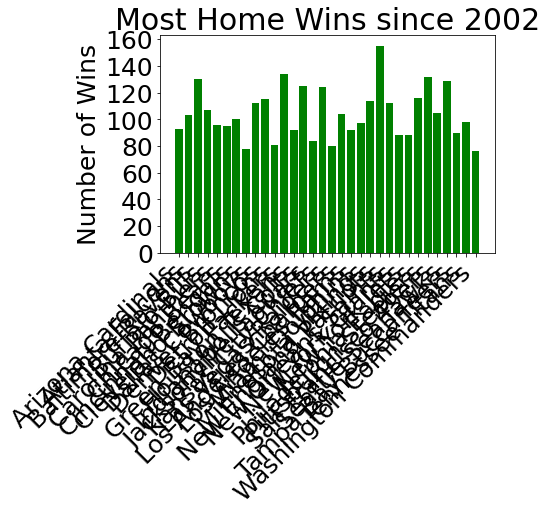

In [58]:
#Bar chart to visualize the teams with the most home wins 2002, saving as PDF in working directory
x = home_wins['team_home']
y = home_wins['home_team_win'].astype(float)
color = ['green']
plt.bar(x,y,color = color)
plt.title('Most Home Wins since 2002',fontsize = 30)
plt.xticks(rotation=45 , horizontalalignment = 'right',fontsize=25)
plt.yticks(fontsize = 25)

plt.ylabel('Number of Wins',fontsize=25)


plt.rcParams["figure.figsize"] = (50,15)
plt.savefig('home_wins.pdf',bbox_inches='tight')

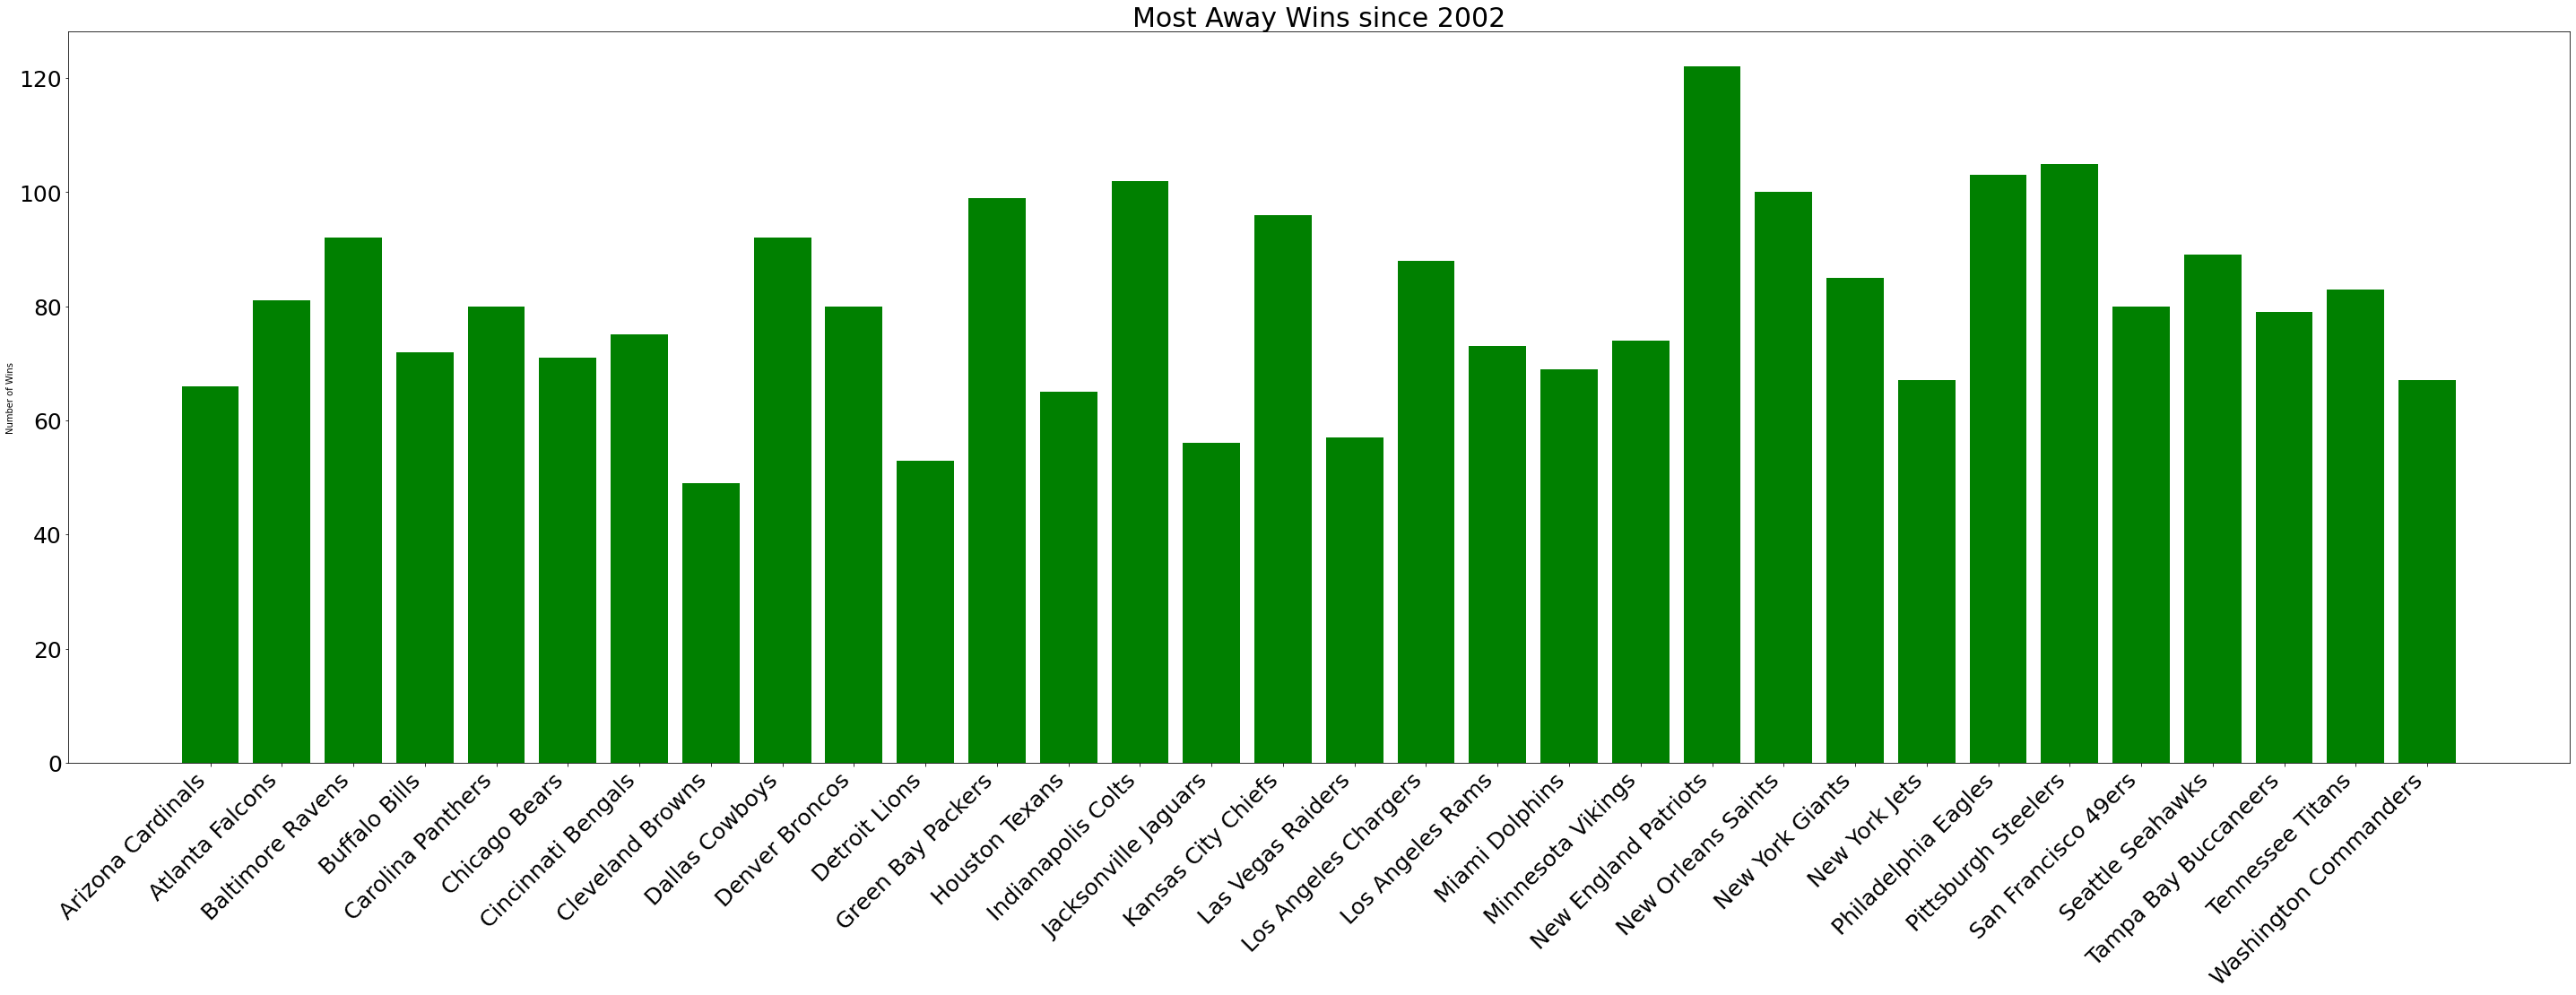

In [59]:
#Bar chart to visualize the teams with the most away wins 2002,saving as PDF in working directory
x = away_wins['team_away']
y = away_wins['away_team_win'].astype(float)

plt.bar(x,y,color = 'green')
plt.title('Most Away Wins since 2002',fontsize = 30)
plt.xticks(rotation=45 , horizontalalignment = 'right',fontsize=25)
plt.yticks(fontsize = 25)

plt.ylabel('Number of Wins')


plt.rcParams["figure.figsize"] = (40,15)
plt.savefig('away_wins.pdf',bbox_inches='tight')

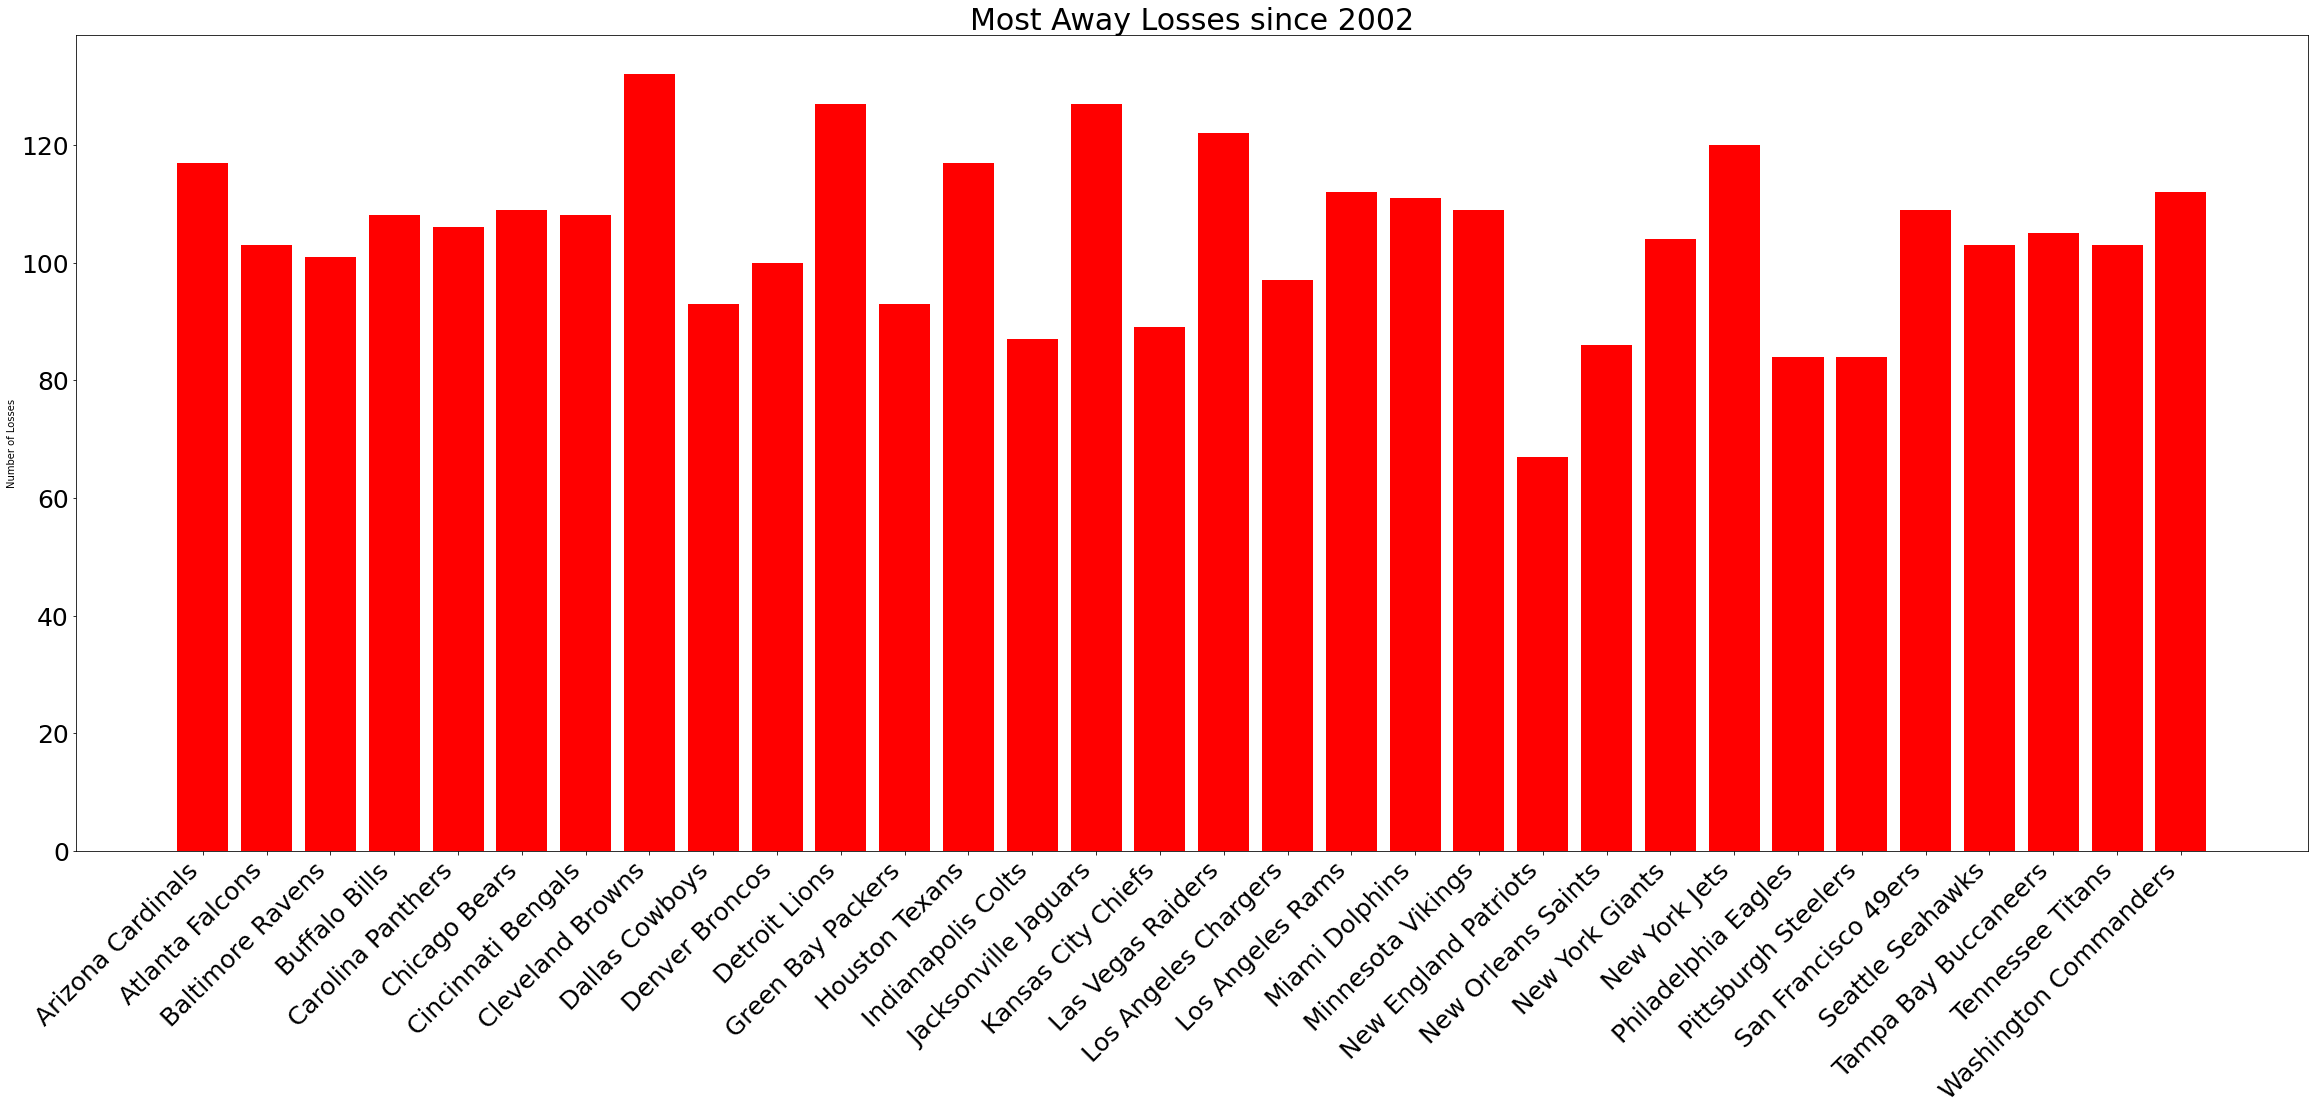

In [60]:
#Bar chart to visualize the teams with the most away losses 2002,saving as PDF in working directory
x = away_wins['team_away']
y = away_wins['home_team_win'].astype(float)

plt.bar(x,y,color='red')
plt.title('Most Away Losses since 2002',fontsize = 30)
plt.xticks(rotation=45 , horizontalalignment = 'right',fontsize=25)
plt.yticks(fontsize = 25)


plt.ylabel('Number of Losses')


plt.rcParams["figure.figsize"] = (40,15)
plt.savefig('away_losses.pdf',bbox_inches='tight')

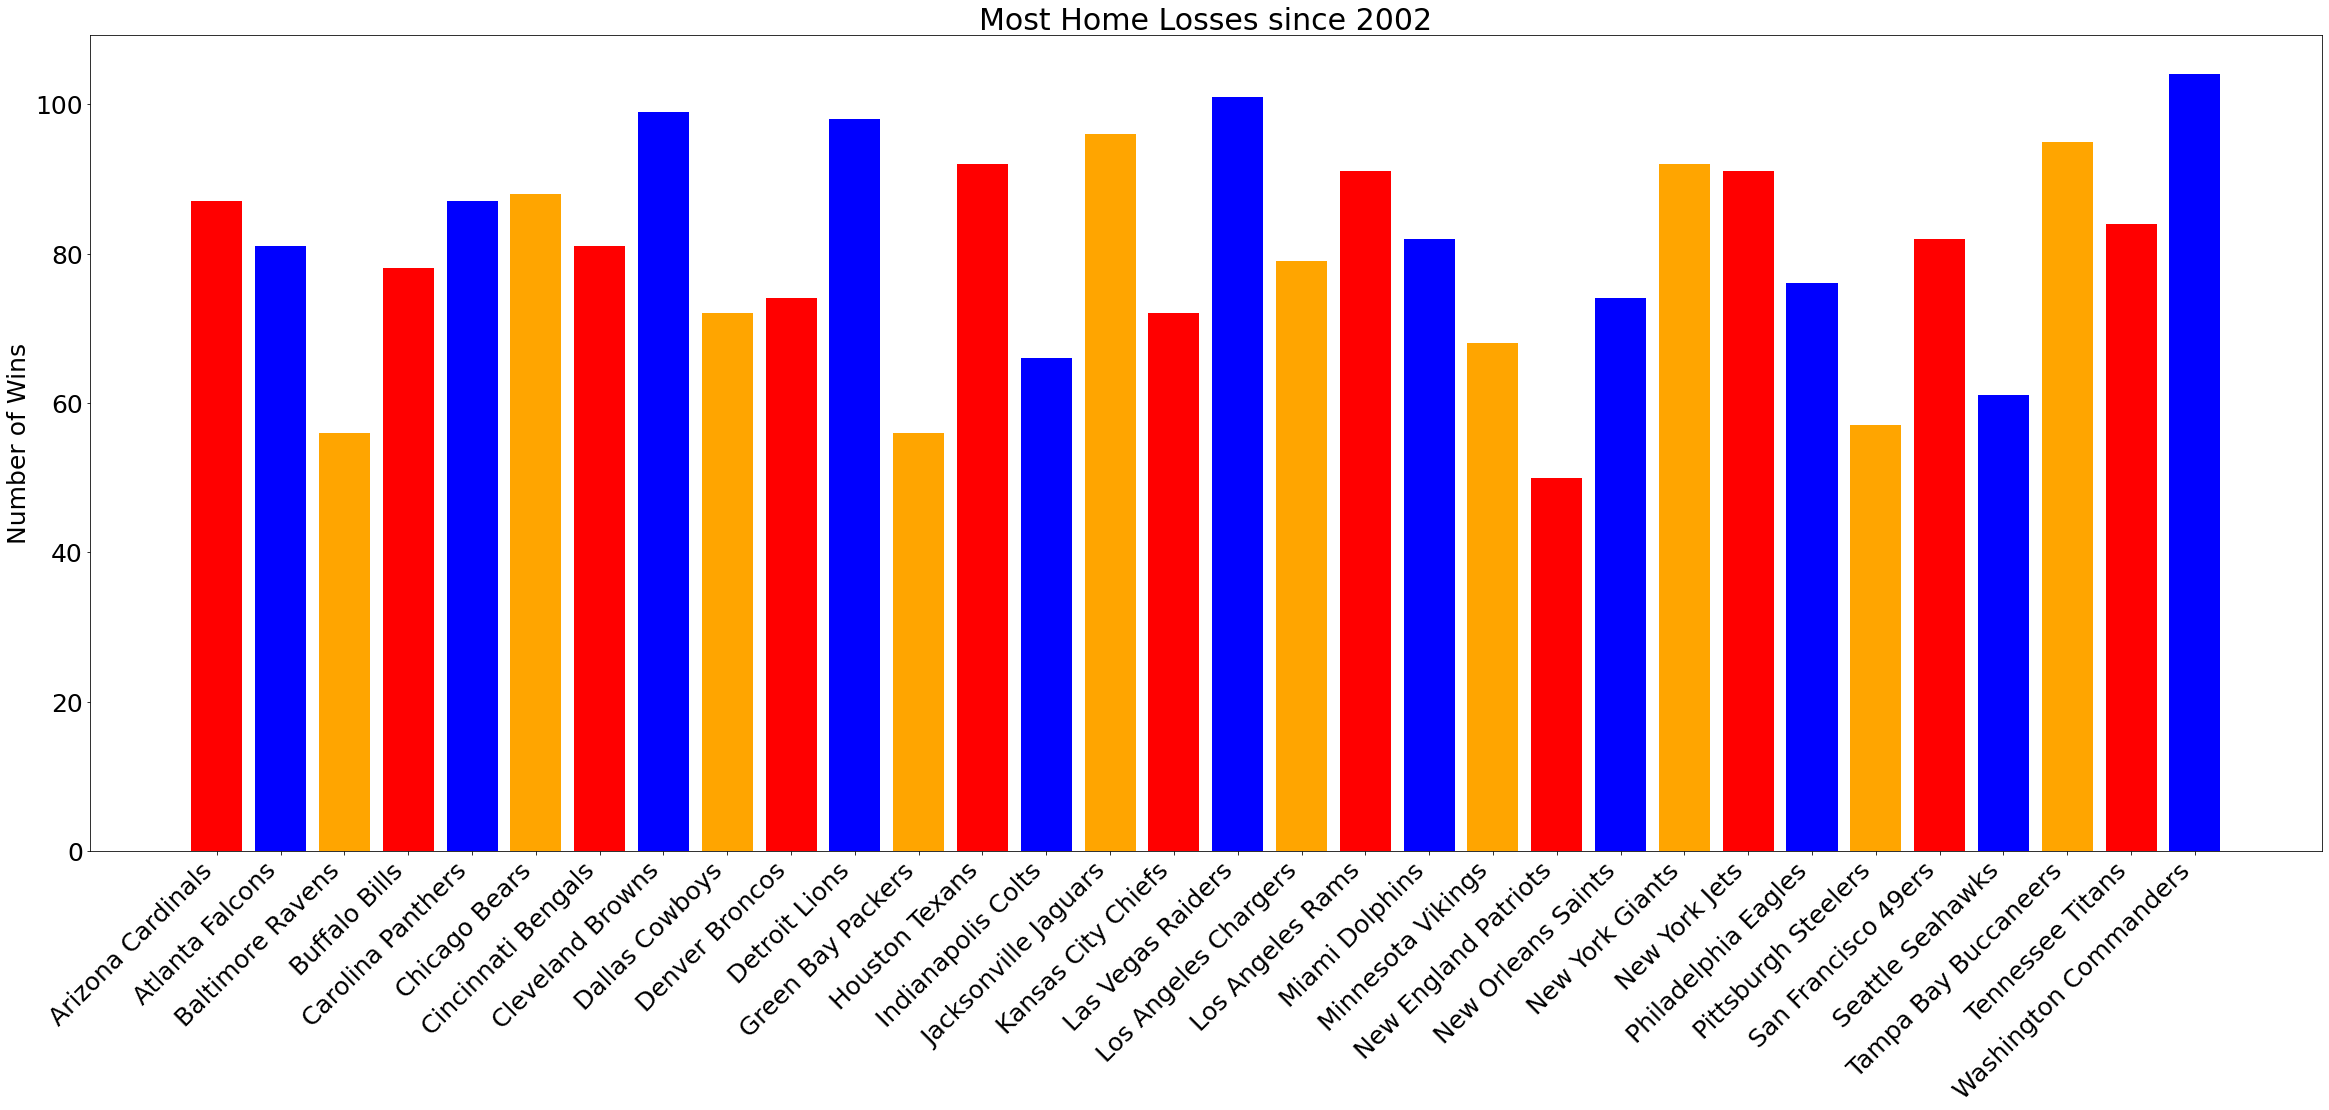

In [61]:
#Bar chart to visualize the teams with the most Home losses 2002,saving as PDF in working directory
x = home_wins['team_home']
y = home_wins['away_team_win'].astype(float)
color = ['red', 'blue', 'orange']
plt.bar(x,y,color = color)
plt.title('Most Home Losses since 2002',fontsize = 30)
plt.xticks(rotation=45 , horizontalalignment = 'right',fontsize=25)
plt.yticks(fontsize = 25)


plt.ylabel('Number of Wins',fontsize=25)


plt.rcParams["figure.figsize"] = (40,15)
plt.savefig('home_losses.pdf',bbox_inches='tight')

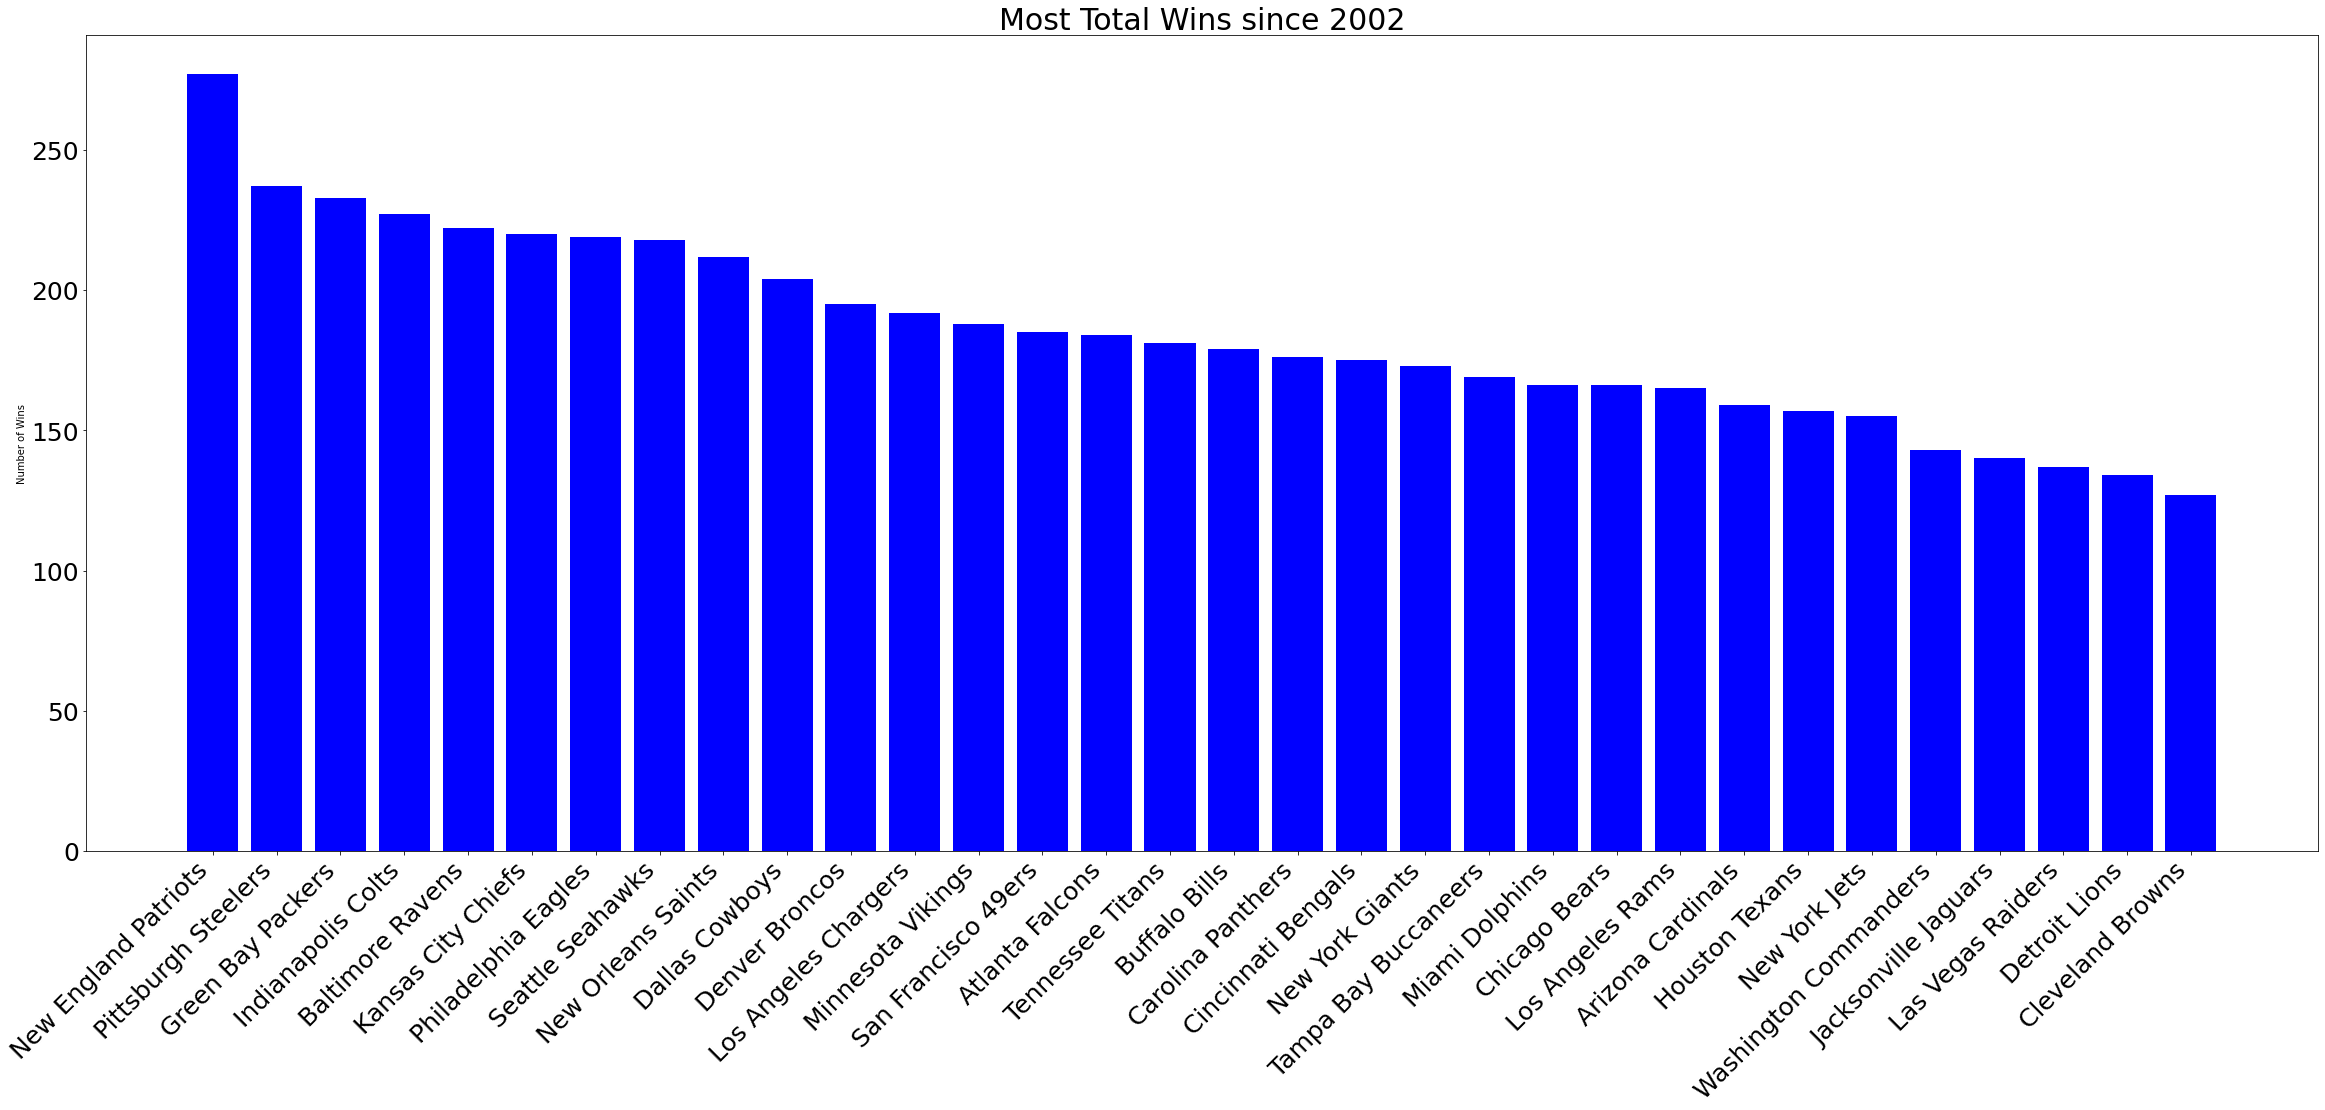

In [62]:
#Bar chart to visualize the teams with the most total wins 2002,saving as PDF in working directory
x = total_wins_sorted['team']
y = total_wins_sorted['win_total']
plt.bar(x,y,color = 'blue')
plt.title('Most Total Wins since 2002',fontsize = 30)
plt.xticks(rotation=45 , horizontalalignment = 'right',fontsize=25)
plt.yticks(fontsize = 25)

plt.ylabel('Number of Wins')


plt.rcParams["figure.figsize"] = (40,15)
plt.savefig('total_wins.pdf',bbox_inches='tight')